In [18]:
import csv
from constants import SEEDS
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import cross_val_predict

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
SEED = SEEDS[2]

albums = pd.read_csv(f'./embeddings/albums_embeddings_node2vec_DFS_80_15_{SEED}.csv', index_col='id', quoting=csv.QUOTE_ALL)
albums.embedding = albums.embedding.apply(lambda embedding: eval(embedding))

# Visualization

In [5]:
pca = PCA(n_components=2, random_state=SEED)
principal_components = pca.fit_transform(np.array(albums.embedding.tolist()))

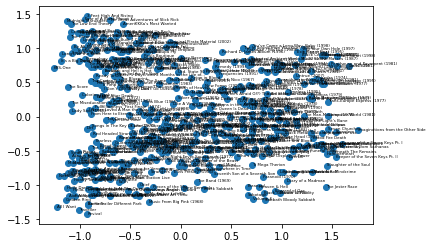

In [16]:
plt.scatter(principal_components[:, 0], principal_components[:, 1])

for index, row in albums.iterrows():
    plt.annotate(row.title, (principal_components[index, 0], principal_components[index, 1]), fontsize=4)

plt.show()

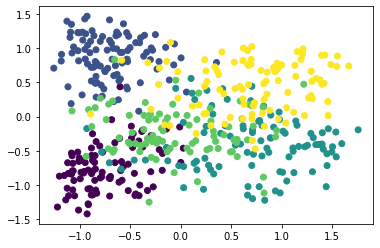

In [19]:
albums_labels = {label:index for index, label in enumerate(albums.label.unique())}
albums_colours = albums.label.map(albums_labels)

plt.scatter(principal_components[:, 0], principal_components[:, 1], c=albums_colours)
plt.show()

# Similarity

In [20]:
cos_similarity = cosine_similarity(np.array(albums.embedding.tolist()), np.array(albums.embedding.tolist()))

In [22]:
albums_index = 295
print(albums.iloc[albums_index].title)

closest_albums = cos_similarity[albums_index].argsort()[-6:][::-1]
for closest_album in closest_albums[1:]:
    print(albums.iloc[closest_album].title, cos_similarity[albums_index, closest_album])

Blood On the Tracks (1975)
Bringing It All Back Home (1965) 0.7211075490845154
Blonde On Blonde (1966) 0.6895580674129186
Highway 61 Revisited (1965) 0.6641049657641893
Music From Big Pink (1968) 0.49508379874894
Screaming for Vengeance 0.48271124711117497


# Classification

In [23]:
X = np.array(albums.embedding.tolist())
y = albums_colours.to_numpy()

logistic_classifier = LogisticRegression(multi_class='ovr', random_state=SEED)
predicted = cross_val_predict(logistic_classifier, X, y, cv=10)

In [24]:
print(classification_report(y, predicted, target_names=albums.label.unique()))

              precision    recall  f1-score   support

     country       0.90      0.95      0.92        93
         rap       0.94      0.94      0.94       100
       metal       0.96      0.95      0.95       100
        rock       0.81      0.79      0.80        86
  electronic       0.87      0.85      0.86        99

    accuracy                           0.90       478
   macro avg       0.89      0.90      0.89       478
weighted avg       0.90      0.90      0.90       478

